# 

In [37]:
import pandas
import numpy
import matplotlib.pyplot as plt

In [2]:
import loan_approval_lib

In [3]:
!pwd

/home/edward/Jupyter-Home/Kaggle/Loan-Approval-Prediction


In [6]:
data = loan_approval_lib.load_data()

In [7]:
type(data)

dict

In [11]:
list(data.keys())

['train', 'test']

In [12]:
data_train = data['train']

In [13]:
data_train

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58640,58640,34,120000,MORTGAGE,5.0,EDUCATION,D,25000,15.95,0.21,Y,10,0
58641,58641,28,28800,RENT,0.0,MEDICAL,C,10000,12.73,0.35,N,8,1
58642,58642,23,44000,RENT,7.0,EDUCATION,D,6800,16.00,0.15,N,2,1
58643,58643,22,30000,RENT,2.0,EDUCATION,A,5000,8.90,0.17,N,3,0


In [44]:
data_train_loan_status_accept = data_train[data_train['loan_status'] == 1]
data_train_loan_status_deny = data_train[data_train['loan_status'] == 0]

In [ ]:
person_age = data_train['person_age']
person_income = data_train['person_income']

In [66]:
def linspace(array):
    return numpy.linspace(array.min(), array.max(), array.max() - array.min())

In [68]:
def logspace(array):
    min_ = numpy.log10(data_train['person_income'].min())
    max_ = numpy.log10(data_train['person_income'].max())
    return numpy.logspace(min_, max_, 50)

In [ ]:
xbins = linspace(data_train['person_age'])
#numpy.linspace(data_train['person_age'].min(), data_train['person_age'].max(), data_train['person_age'].max() - data_train['person_age'].min())

In [ ]:
xbins

In [69]:
ybins = logspace(data_train['person_income'])
#numpy.logspace(numpy.log10(data_train['person_income'].min()), numpy.log10(data_train['person_income'].max()), 100)

In [ ]:
ybins

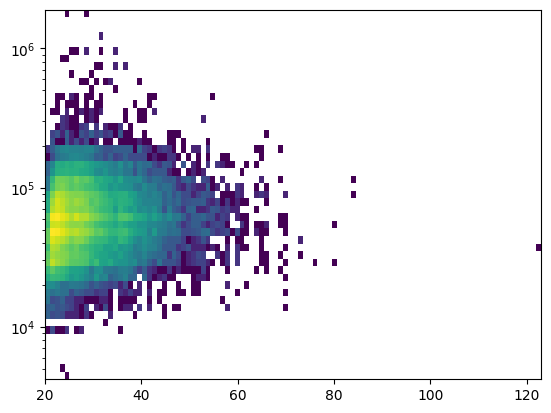

In [70]:
bins = [xbins, ybins]
_ = plt.hist2d(data_train['person_age'], data_train['person_income'], bins=bins, norm='log')
#plt.gcf().
plt.yscale('log')

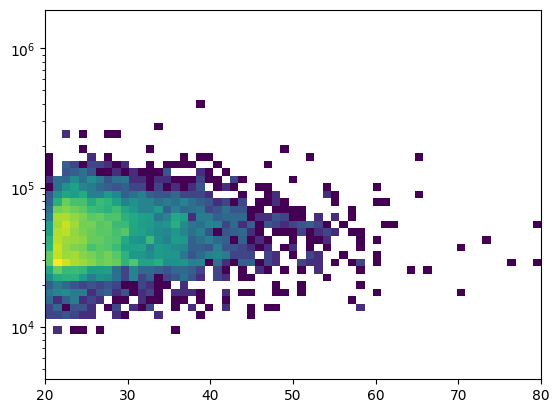

In [72]:
bins = [linspace(data_train_loan_status_accept['person_age']), logspace(data_train_loan_status_accept['person_income'])]
_ = plt.hist2d(data_train_loan_status_accept['person_age'], data_train_loan_status_accept['person_income'], bins=bins, norm='log')
plt.yscale('log')

In [63]:
numpy.sort(data_train_loan_status_accept['person_age'].unique())

array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 60, 61, 62, 64, 65, 66, 70, 73, 76, 80])

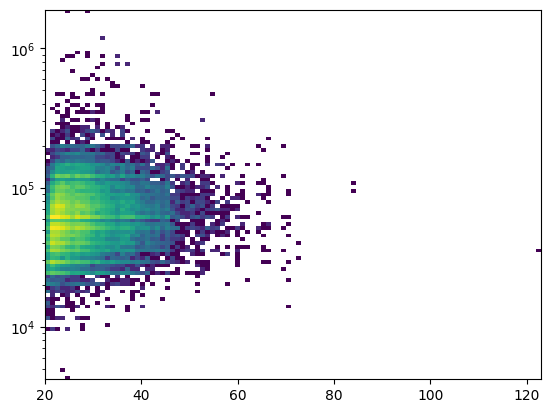

In [48]:
bins = [
    numpy.linspace(data_train_loan_status_deny['person_age'].min(), data_train_loan_status_deny['person_age'].max(), 100),
    numpy.logspace(numpy.log10(data_train_loan_status_deny['person_income'].min()), numpy.log10(data_train_loan_status_deny['person_income'].max()), 100),
]
_ = plt.hist2d(data_train_loan_status_deny['person_age'], data_train_loan_status_deny['person_income'], bins=bins, norm='log')
plt.yscale('log')

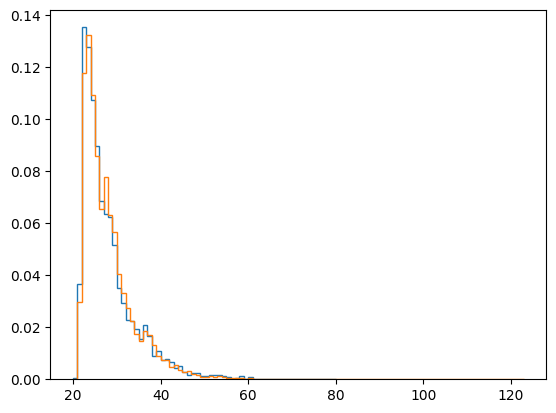

In [79]:
_ = plt.hist(
    data_train_loan_status_accept['person_age'],
    bins=data_train_loan_status_accept['person_age'].max() - data_train_loan_status_accept['person_age'].min(),
    histtype='step',
    density=True,
)
_ = plt.hist(
    data_train_loan_status_deny['person_age'],
    bins=data_train_loan_status_deny['person_age'].max() - data_train_loan_status_deny['person_age'].min(),
    histtype='step',
    density=True,
)

In [81]:
import seaborn

In [85]:
data_train.columns

Index(['id', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status'],
      dtype='object')

In [86]:
pairplot_columns = [
    'person_age', 'person_income', 'person_home_ownership',
    'person_emp_length',
    'loan_intent', 'loan_grade', 'loan_amnt', 'loan_int_rate', 'loan_percent_income',
    'cb_person_default_on_file', 'cb_person_cred_hist_length', 'loan_status',
]

In [92]:
data_train['person_home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

In [91]:
data_train['loan_intent'].unique()

array(['EDUCATION', 'MEDICAL', 'PERSONAL', 'VENTURE', 'DEBTCONSOLIDATION',
       'HOMEIMPROVEMENT'], dtype=object)

In [93]:
data_train['loan_grade'].unique()

array(['B', 'C', 'A', 'D', 'E', 'F', 'G'], dtype=object)

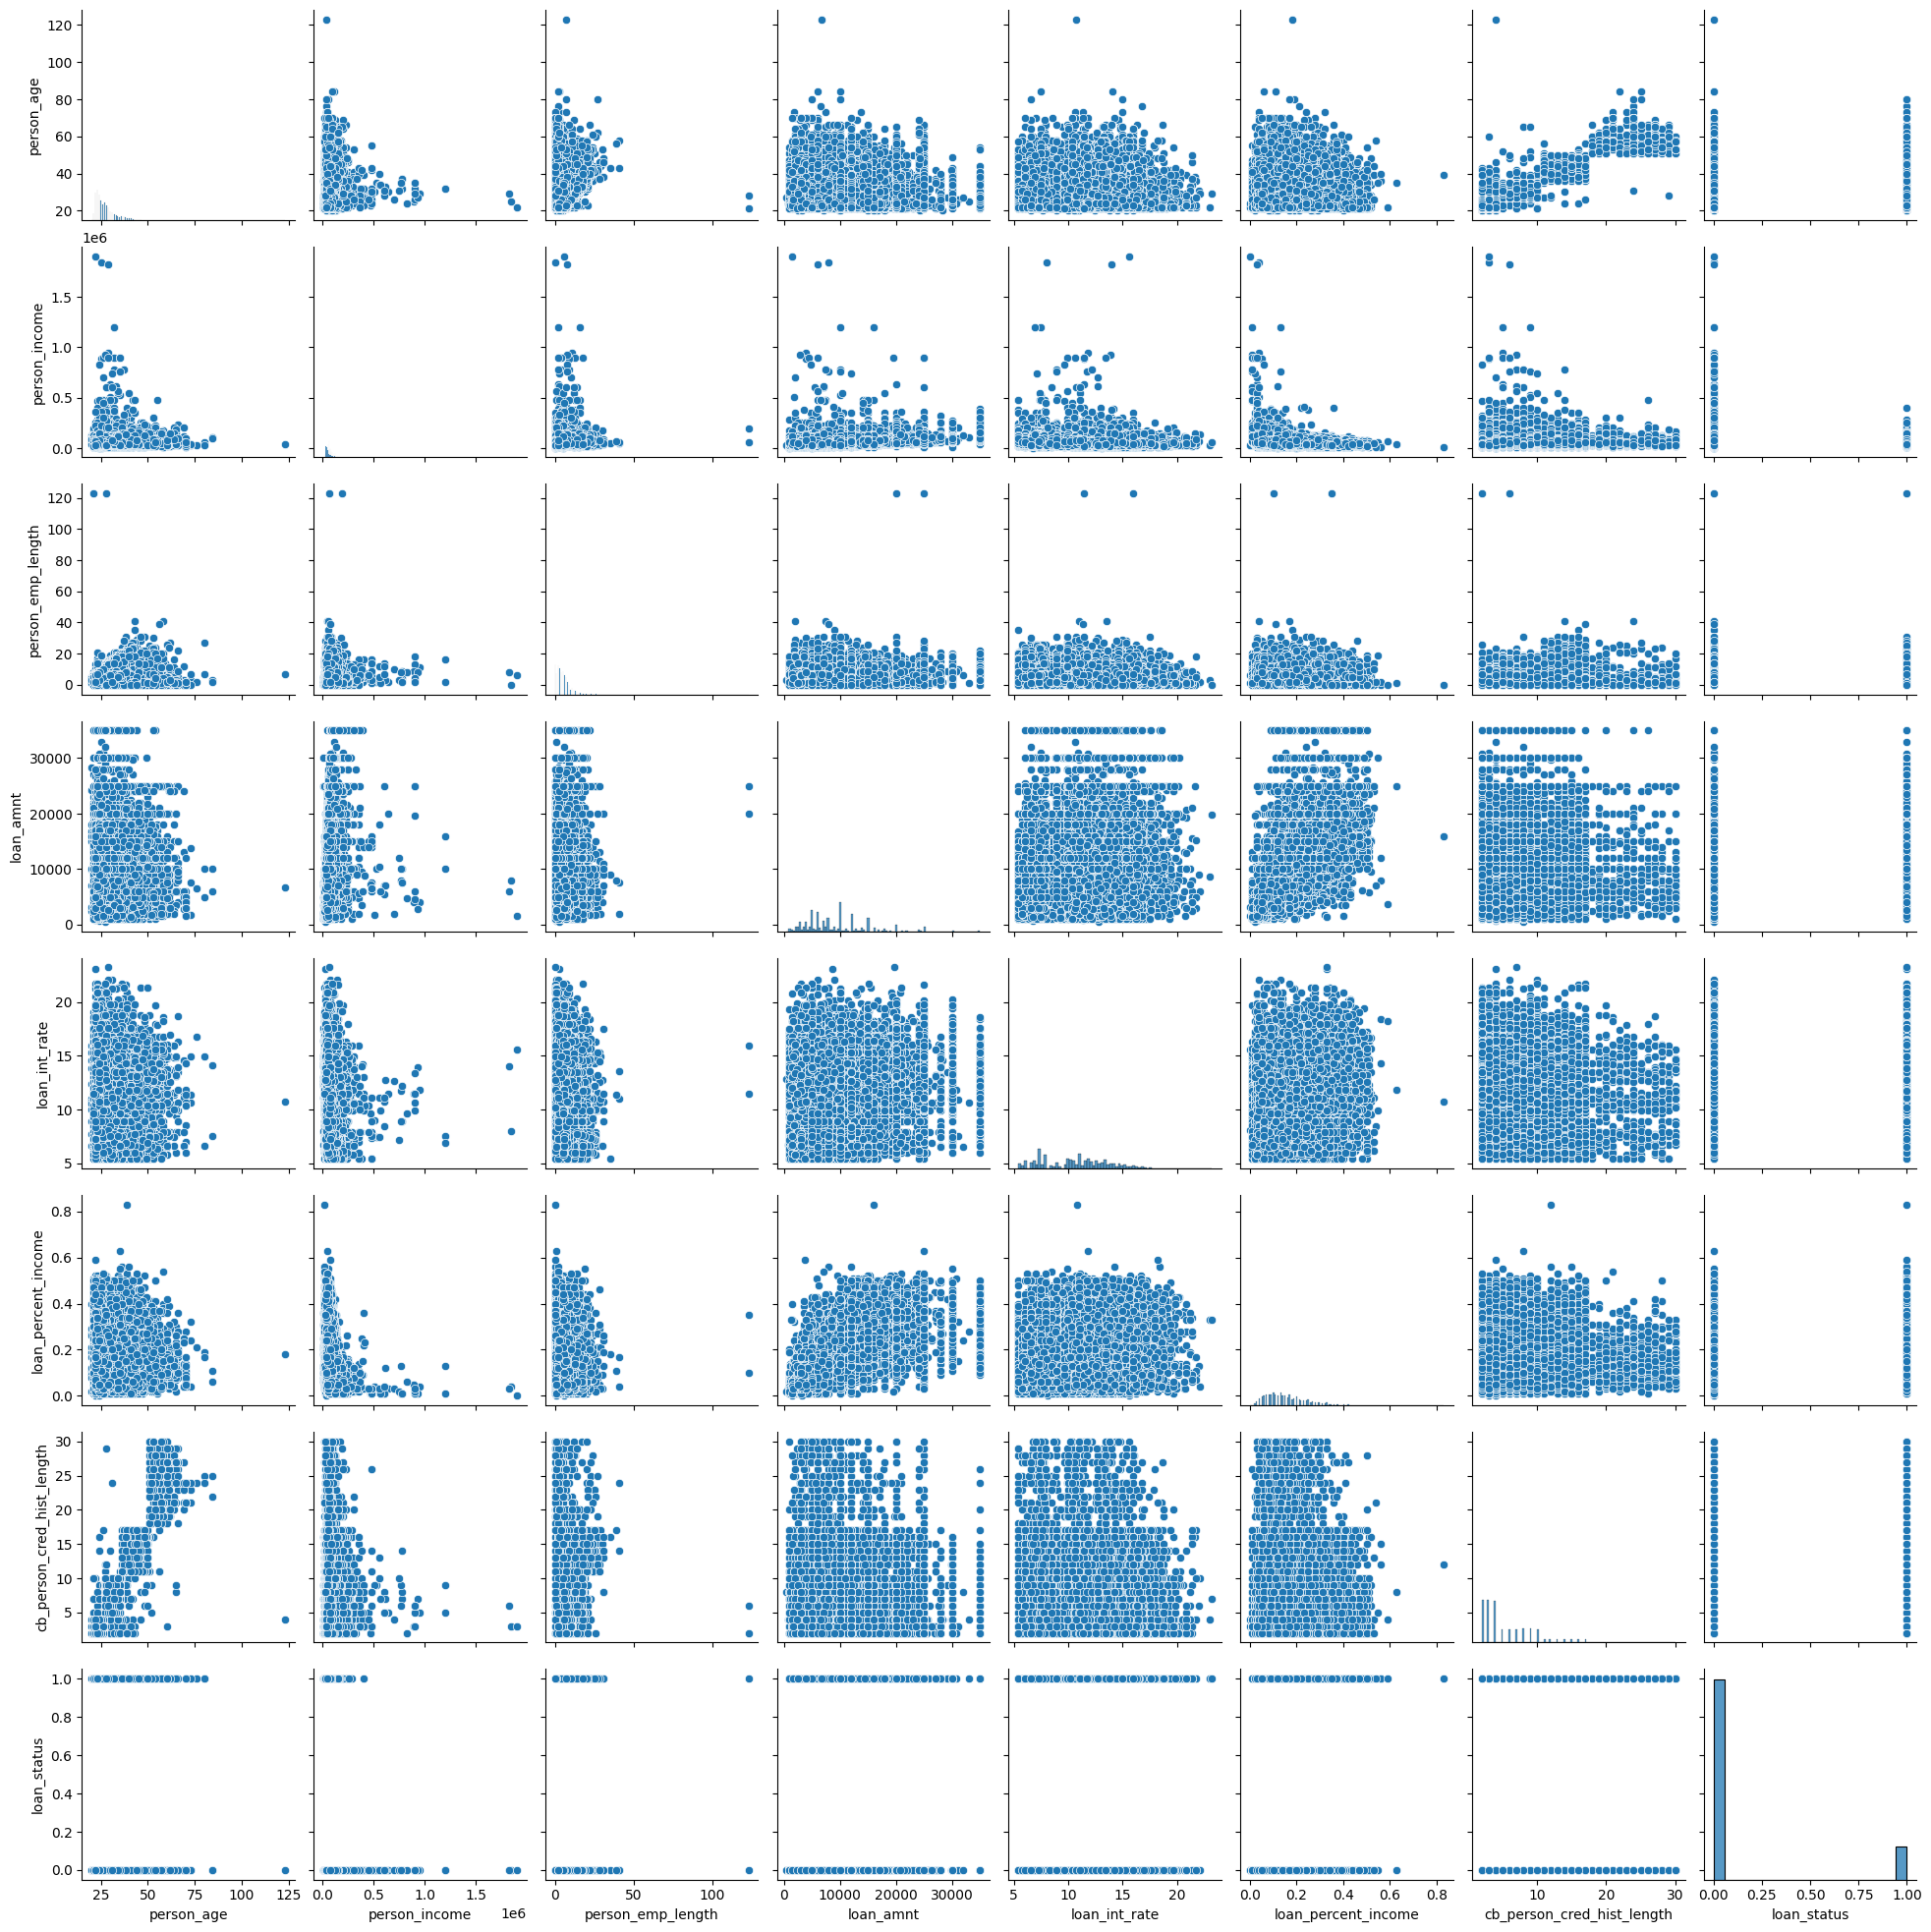

In [87]:
seaborn.pairplot(data_train[pairplot_columns])
plt.show()

Credit History Length

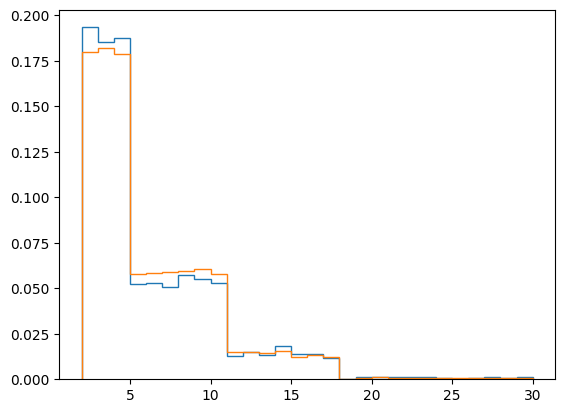

In [94]:
_ = plt.hist(
    data_train_loan_status_accept['cb_person_cred_hist_length'],
    bins=data_train_loan_status_accept['cb_person_cred_hist_length'].max() - data_train_loan_status_accept['cb_person_cred_hist_length'].min(),
    histtype='step',
    density=True,
)
_ = plt.hist(
    data_train_loan_status_deny['cb_person_cred_hist_length'],
    bins=data_train_loan_status_deny['cb_person_cred_hist_length'].max() - data_train_loan_status_deny['cb_person_cred_hist_length'].min(),
    histtype='step',
    density=True,
)

Person Income

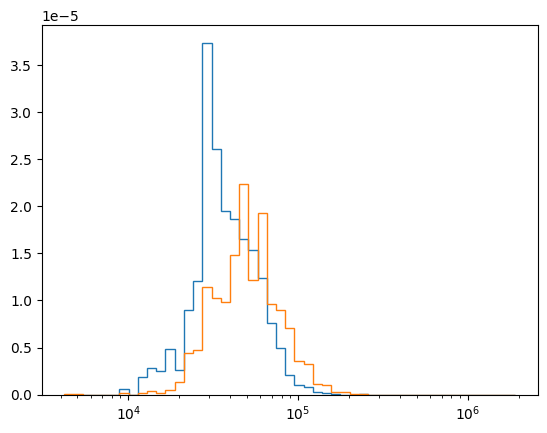

In [103]:
column = 'person_income'

_ = plt.hist(
    data_train_loan_status_accept[column],
    bins=logspace(data_train_loan_status_accept[column]),
    histtype='step',
    density=True,
)
_ = plt.hist(
    data_train_loan_status_deny[column],
    bins=logspace(data_train_loan_status_deny[column]),
    histtype='step',
    density=True,
)
plt.xscale('log')
#plt.yscale('log')